In [107]:
import json
from ingredient_parser import parse_ingredient
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

### Import Recipes from API ###

In [108]:
# response = requests.get("https://recipeapi-kachikwu-37473924f8f6.herokuapp.com/recipes/?limit=24000")
# json_file_path = "recipes.json"
# with open(json_file_path, "w") as json_file:
#     json.dump(response.json(), json_file, indent=2)

# json_file_path = "recipes.json"
# with open(json_file_path, 'r') as json_file:
#     recipes_data = json.load(json_file)

### normalize the ingredients ###

In [109]:
#parsing structured information out of recipe ingredient sentences.
def normalize_ingredient(ingredient):
    parsed_ingredient = parse_ingredient(ingredient)
    return parsed_ingredient.name.text

In [110]:
#normalize all ingredients
# for i in range(len(recipes_data)):
#     print(i)
#     ingredients =[]
#     for ingredient in recipes_data[i]["ingredients"]:
#         try:
#             normalized_ingredient = normalize_ingredient(ingredient)
#             ingredients.append(normalized_ingredient)
#         except:
#             ingredients.append(ingredient)
#     recipes_data[i]["ingredients"] = ingredients

# json_str = json.dumps(recipes_data, indent=4)
# json_file_path = "normalized_recipes.json"
# with open(json_file_path, "w") as json_file:
#     json.dump(recipes_data, json_file, indent=2)

In [113]:
json_file_path = "normalized_recipes.json"
with open(json_file_path, 'r') as json_file:
    recipes = json.load(json_file)

### Ingredient Frequency Analysis ###

In [114]:
# Create a dictionary to store ingredient frequencies for each cuisine
cuisine_ingredient_freq = {}

# Iterate through each recipe
for recipe in recipes:
    cuisine = recipe["cuisine"]["name"]
    ingredients = recipe["ingredients"]
    if cuisine not in cuisine_ingredient_freq:
        cuisine_ingredient_freq[cuisine] = {}
    for ingredient in ingredients:
        # Increment the count for the ingredient in the dictionary
        cuisine_ingredient_freq[cuisine][ingredient] = cuisine_ingredient_freq[cuisine].get(ingredient, 0) + 1

# Summarize the top ingredients for each cuisine
top_ingredients_summary = {}
for cuisine, top_ingredients in top_ingredients_per_cuisine.items():
    top_ingredient_names = top_ingredients.index.tolist()
    top_ingredients_summary[cuisine] = top_ingredient_names

for cuisine, top_ingredients in top_ingredients_summary.items():
    print(f"Top ingredients for {cuisine} cuisine:")
    print(", ".join(top_ingredients))
    print()

Top ingredients for amish and mennonite cuisine:
salt, white sugar, all-purpose flour, eggs, milk

Top ingredients for australian and new zealander cuisine:
white sugar, all-purpose flour, salt, vanilla extract, butter

Top ingredients for austrian cuisine:
white sugar, all-purpose flour, eggs, butter, salt

Top ingredients for cuban cuisine:
garlic, olive oil, salt, onion, ground cumin

Top ingredients for jamaican cuisine:
salt, brown sugar, garlic, ground allspice, ground cinnamon

Top ingredients for argentinian cuisine:
salt, garlic, olive oil, red wine vinegar, egg

Top ingredients for lebanese cuisine:
salt, garlic, olive oil, white sugar, onion

Top ingredients for scandinavian cuisine:
salt, white sugar, butter, all-purpose flour, milk

Top ingredients for belgian cuisine:
salt, all-purpose flour, vegetable oil, butter, water

Top ingredients for brazilian cuisine:
white sugar, salt, garlic, water, onion

Top ingredients for bangladeshi cuisine:
ground turmeric, salt, water, v

### Ingredient Frequency Visualization: ###
<p>Visualize the top ingredients for each cuisine using bar charts or word clouds. This can provide a more intuitive understanding of ingredient popularity within each cuisine.</p>

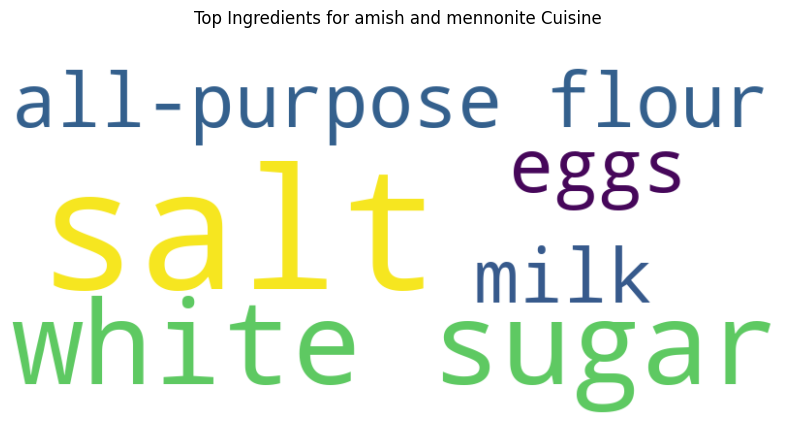

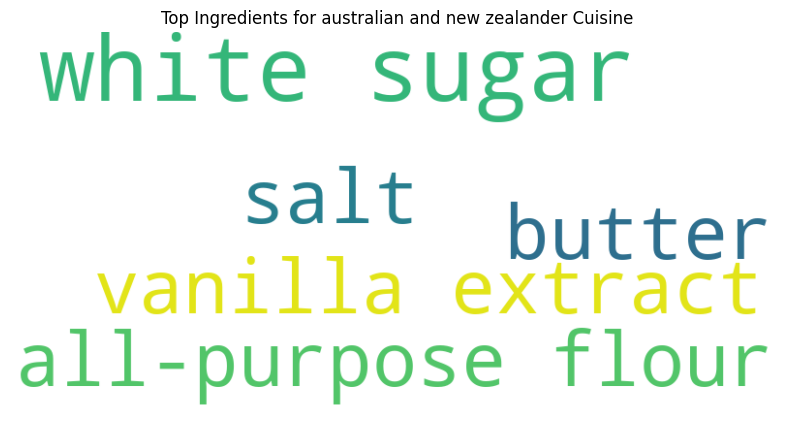

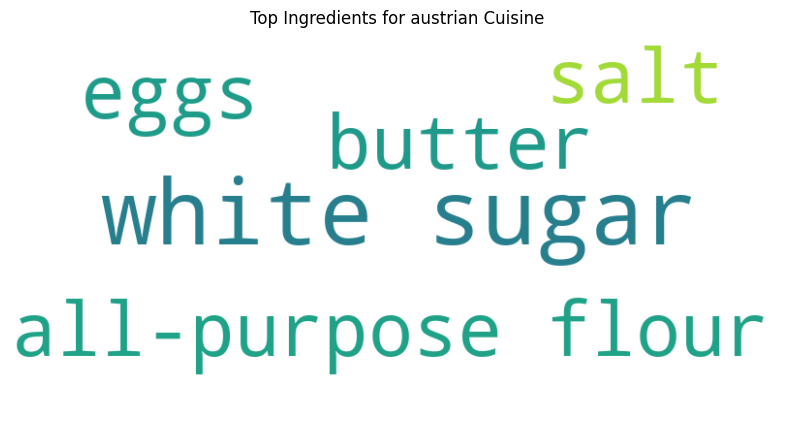

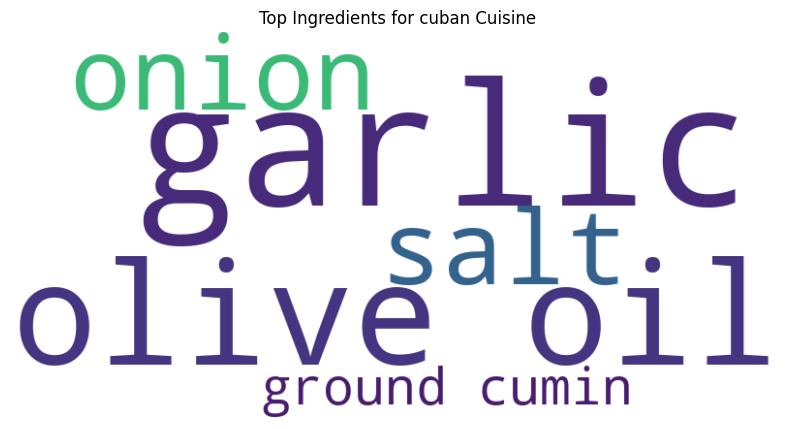

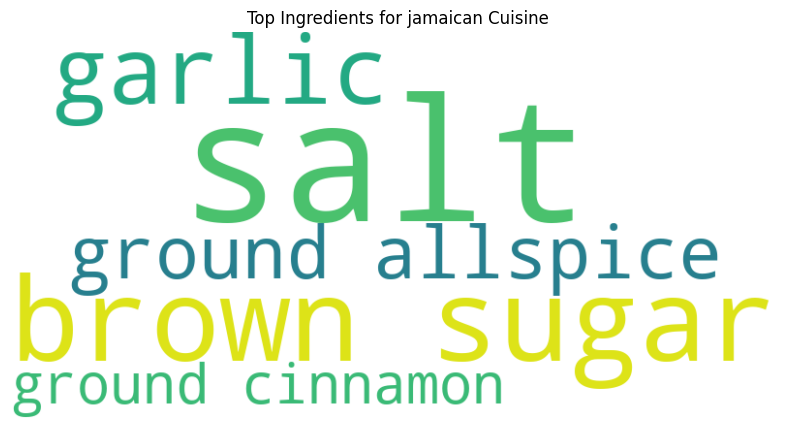

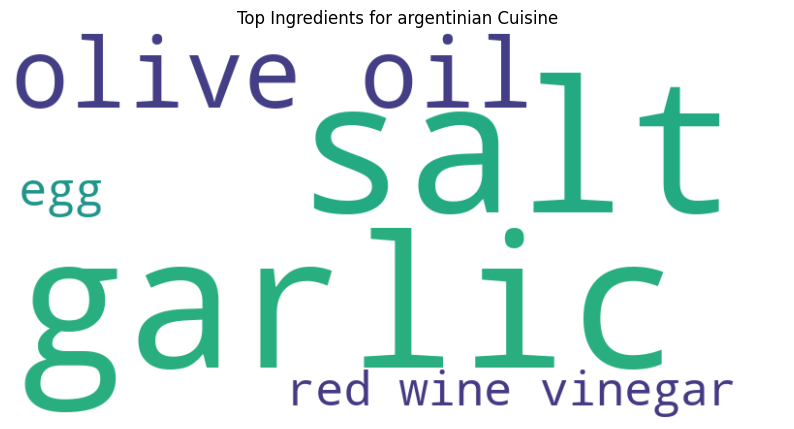

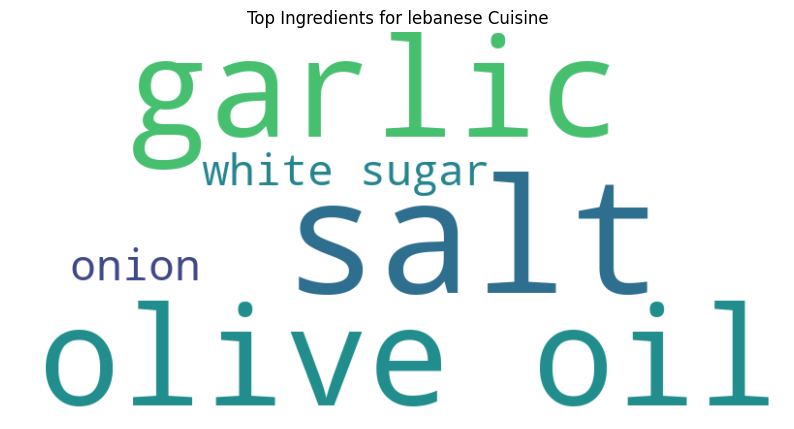

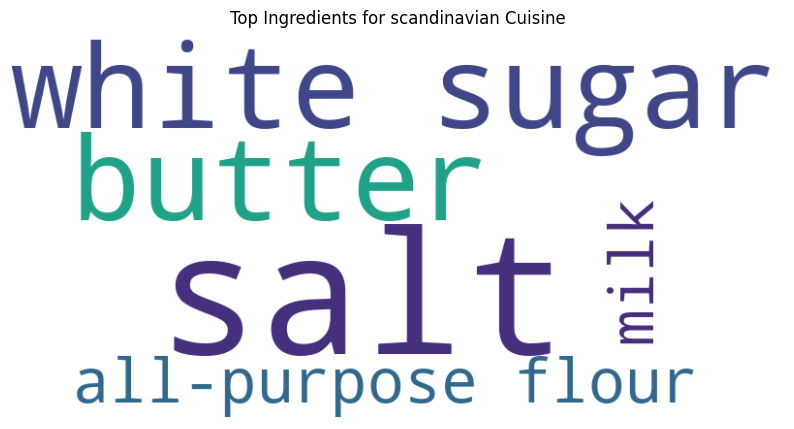

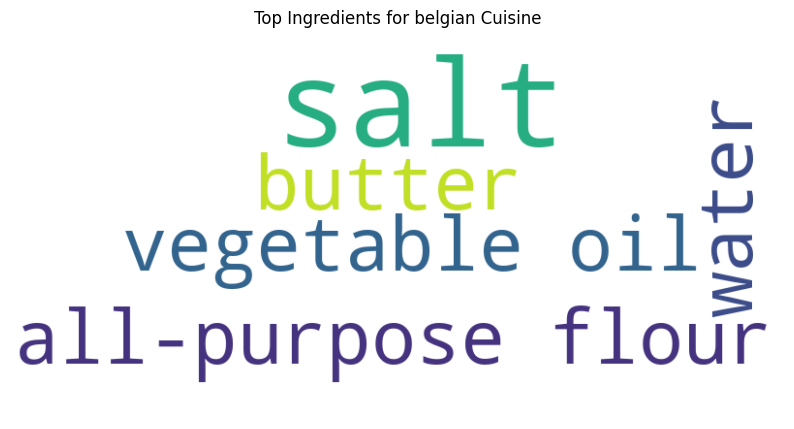

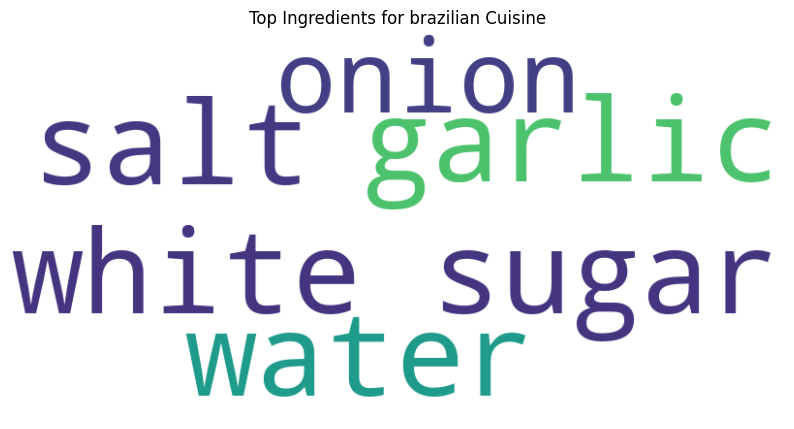

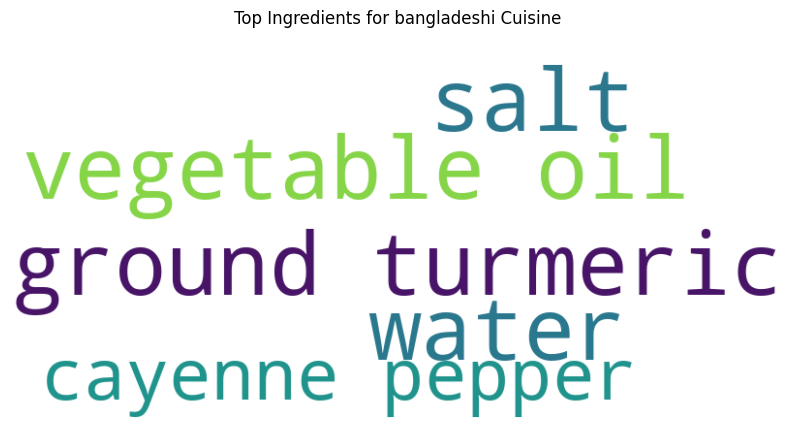

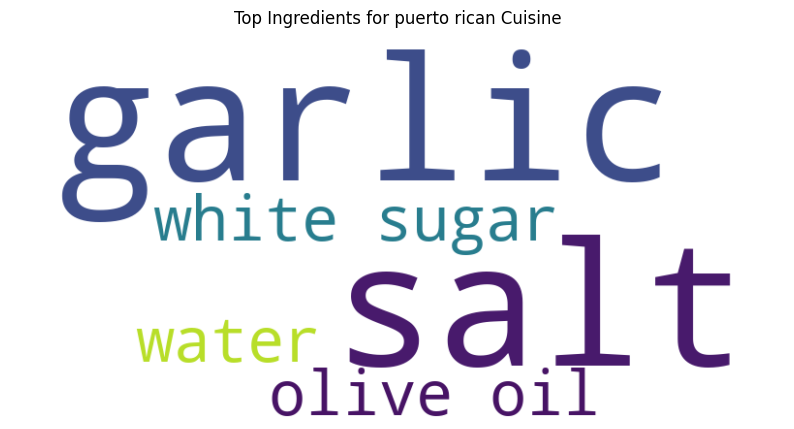

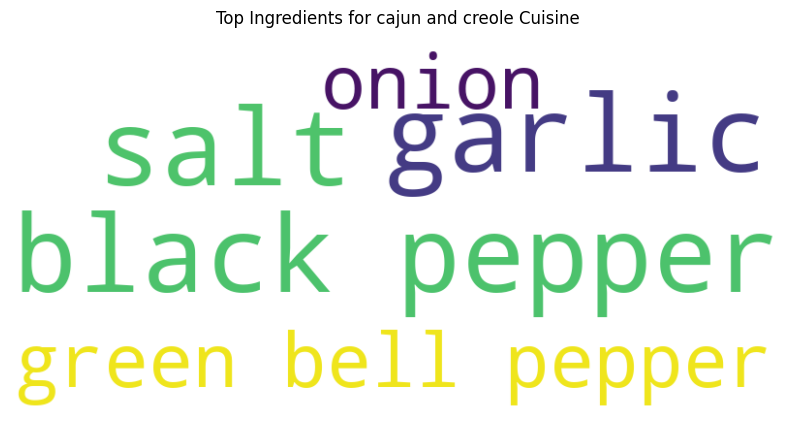

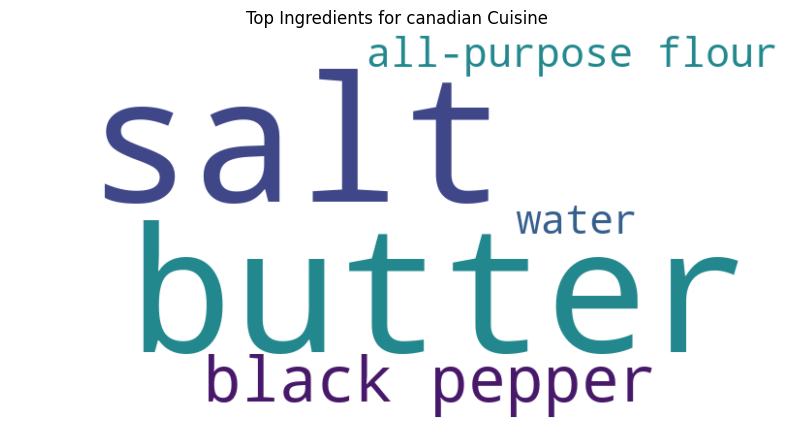

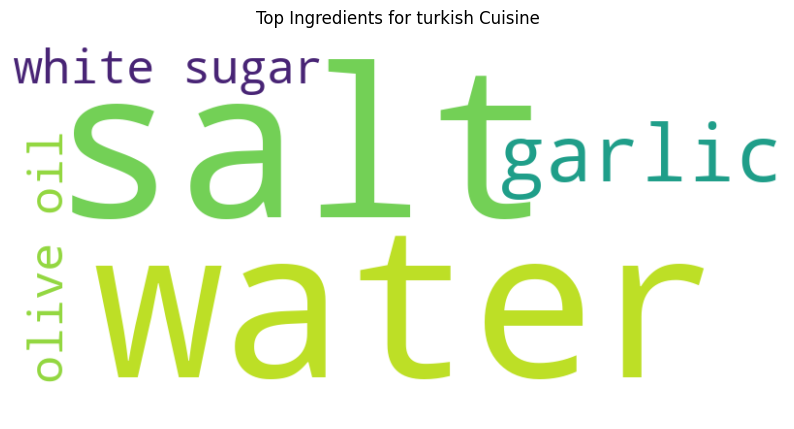

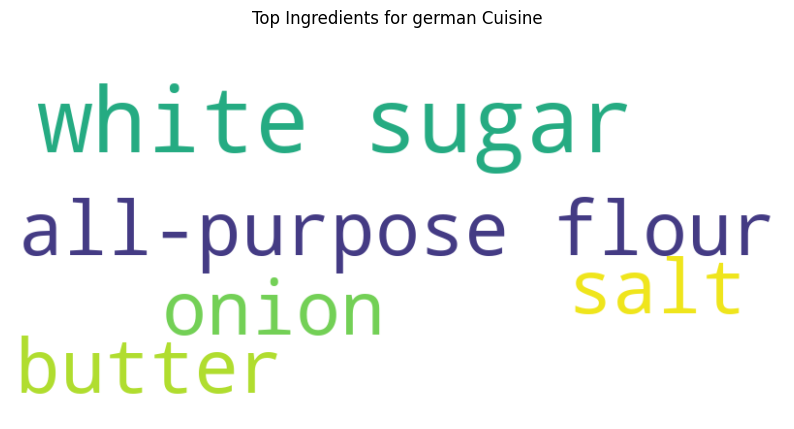

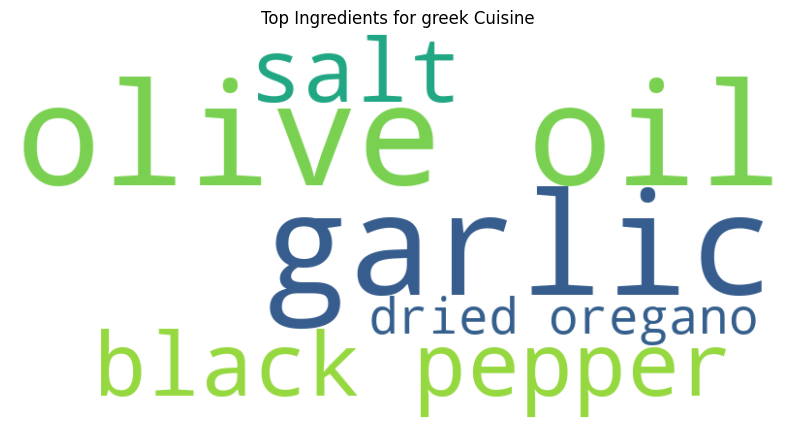

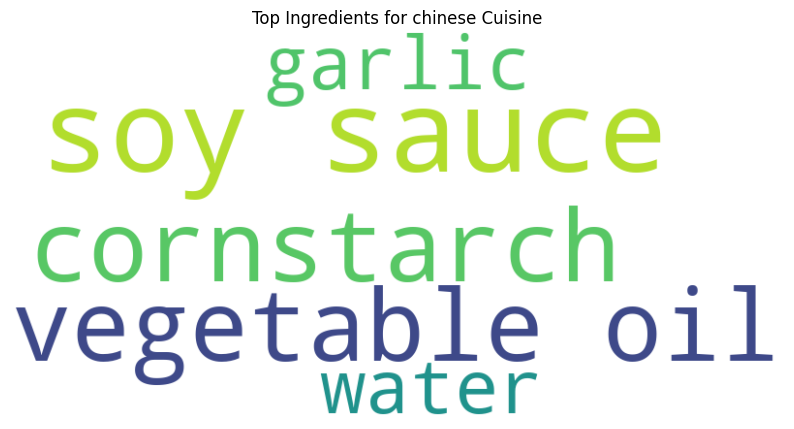

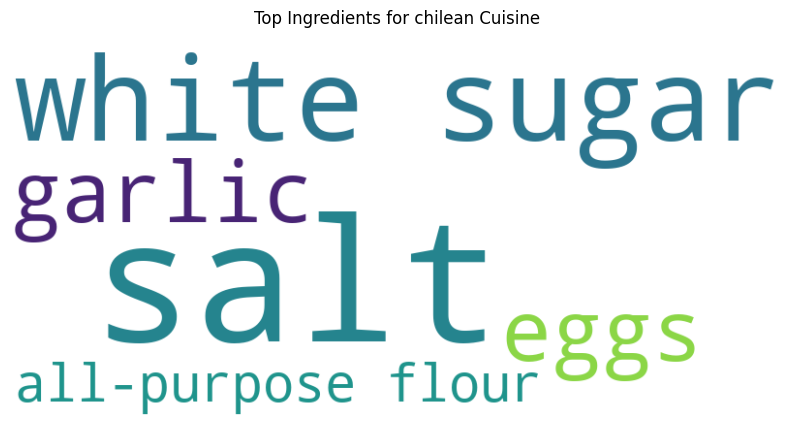

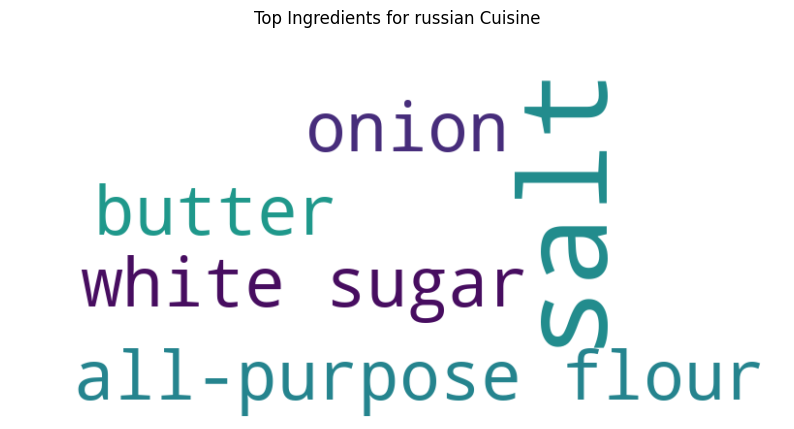

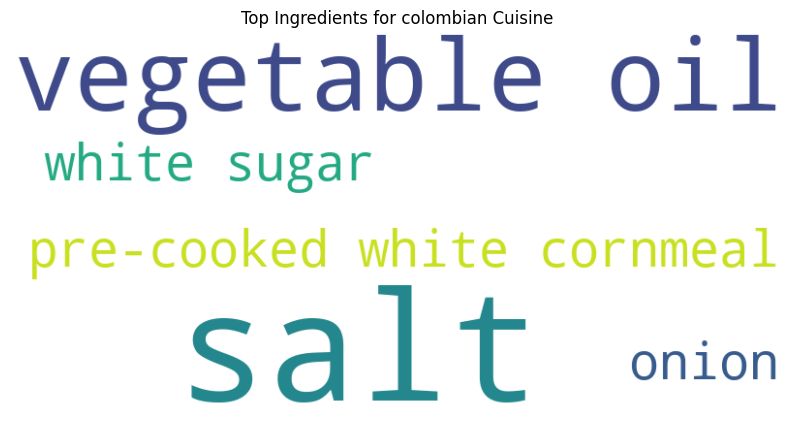

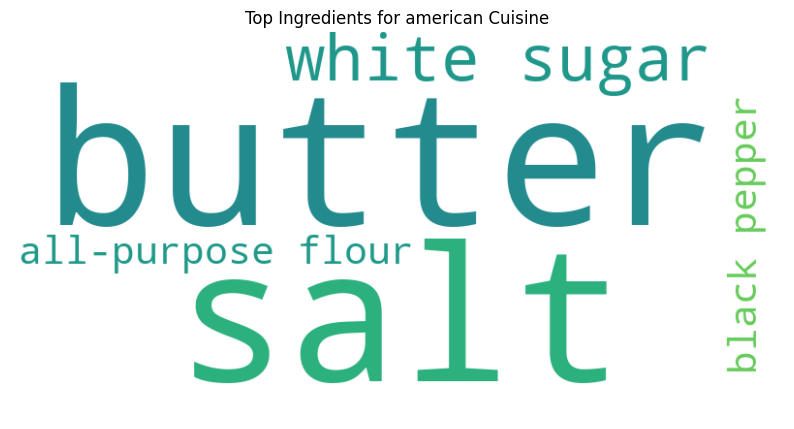

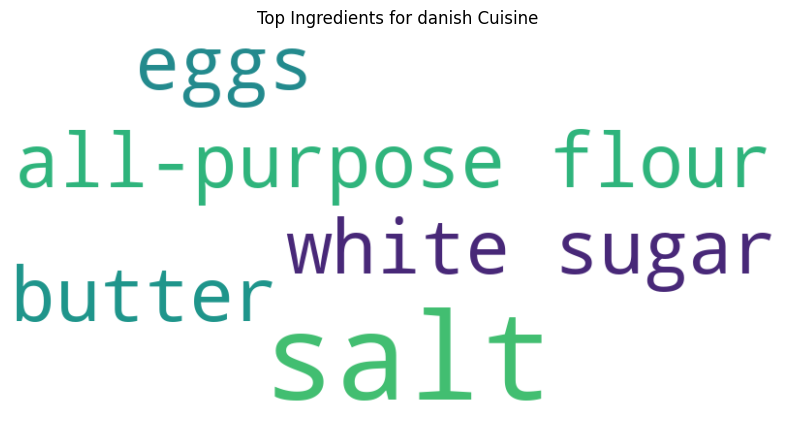

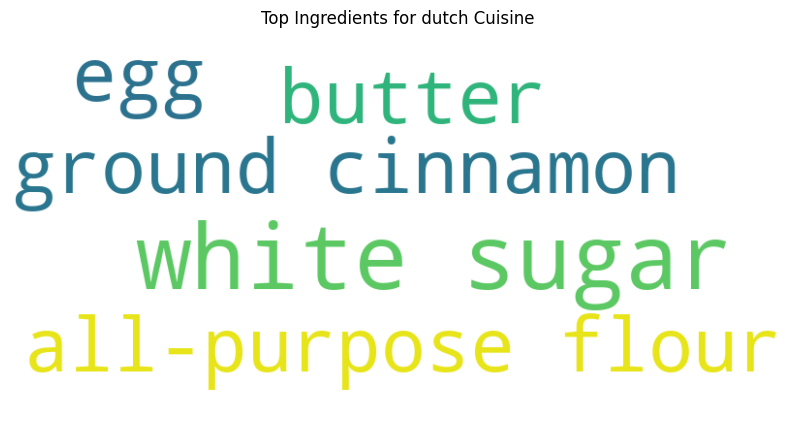

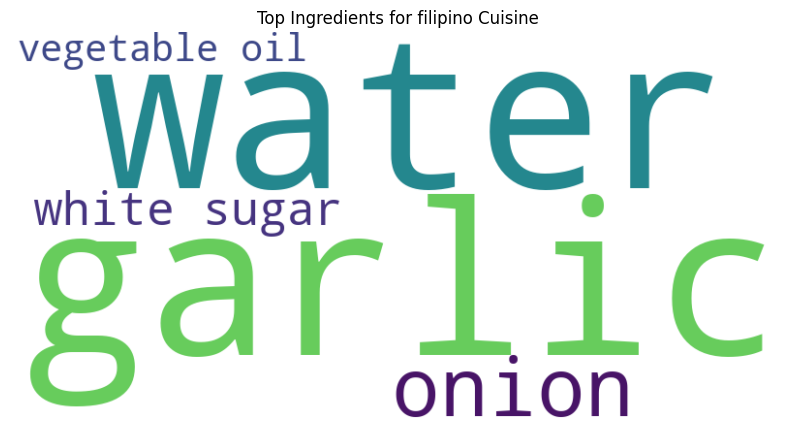

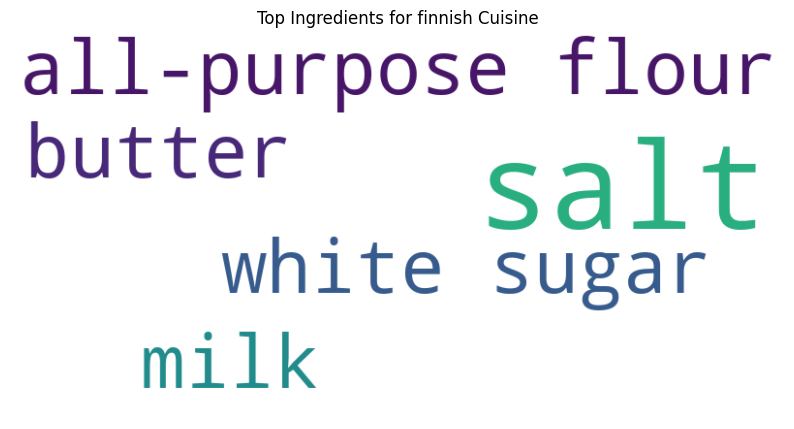

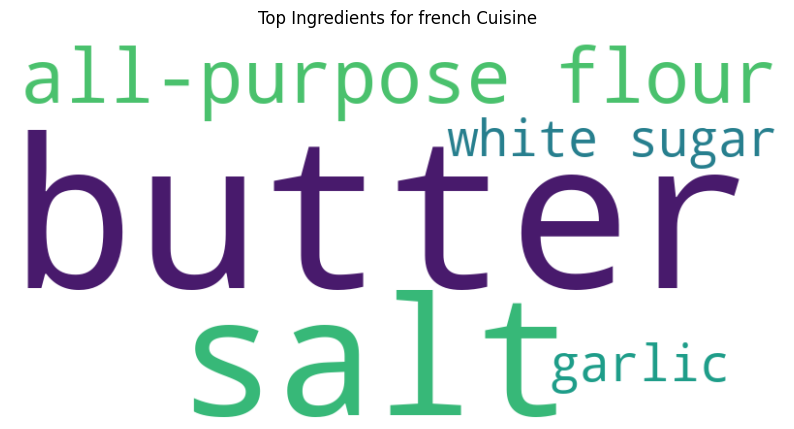

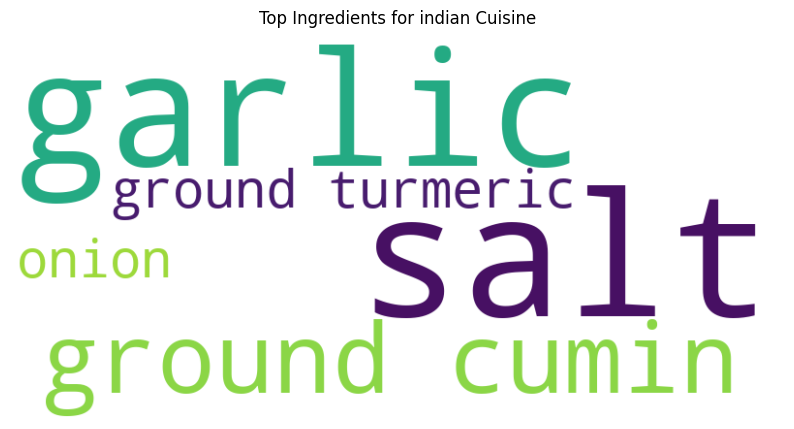

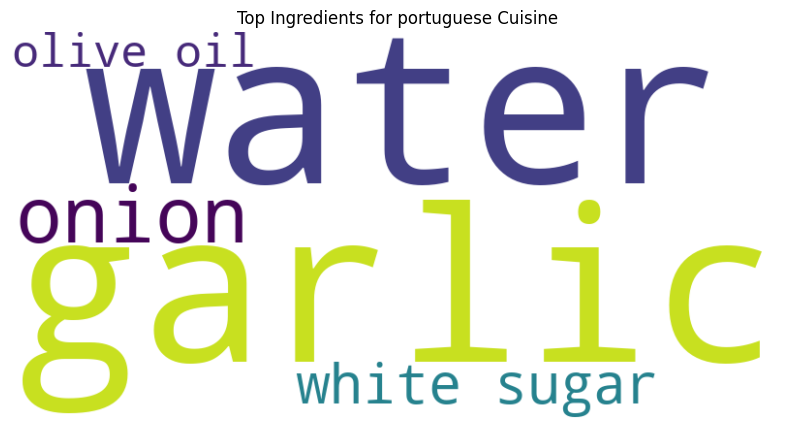

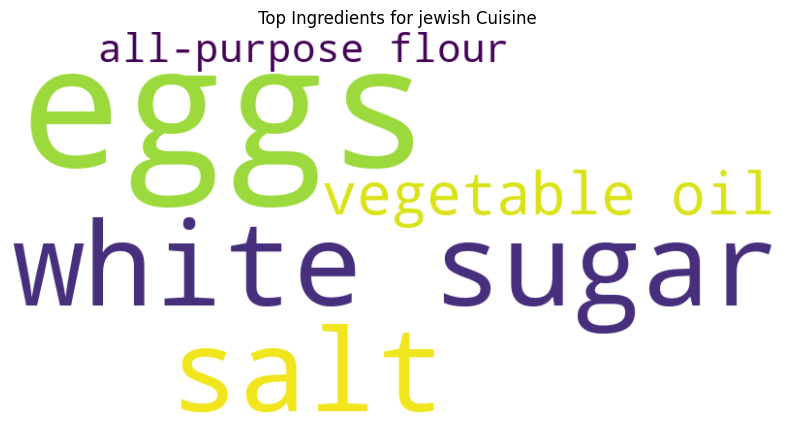

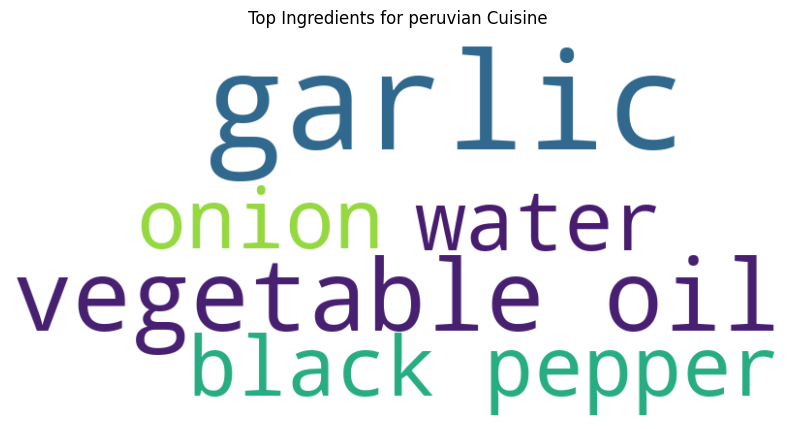

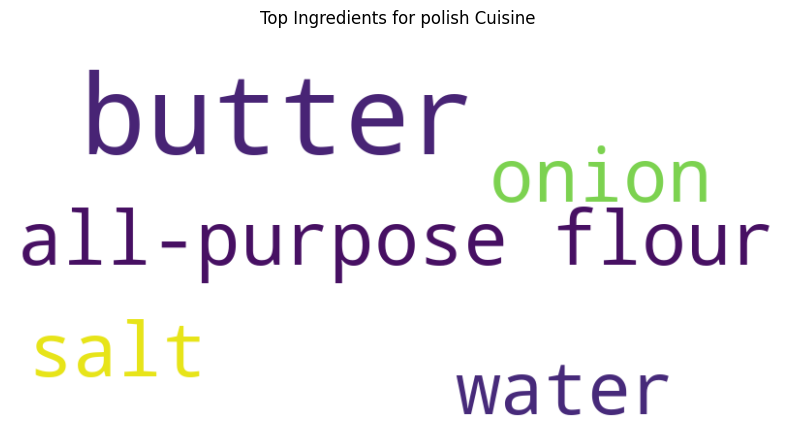

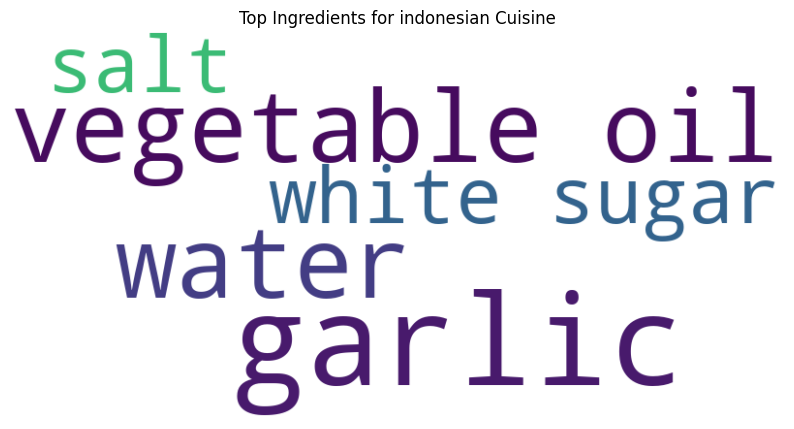

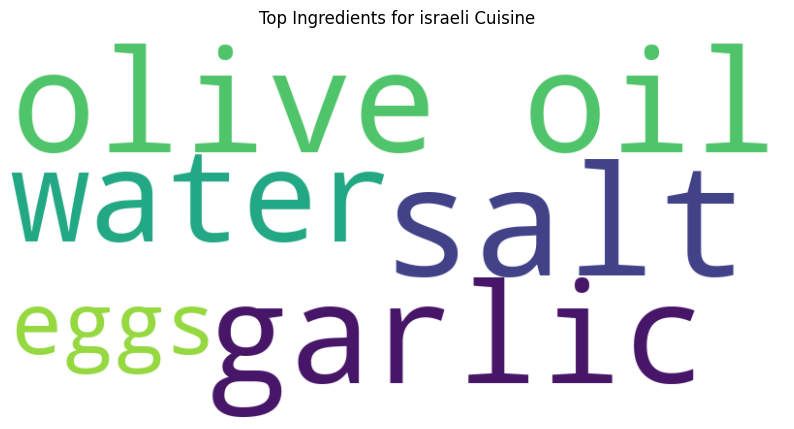

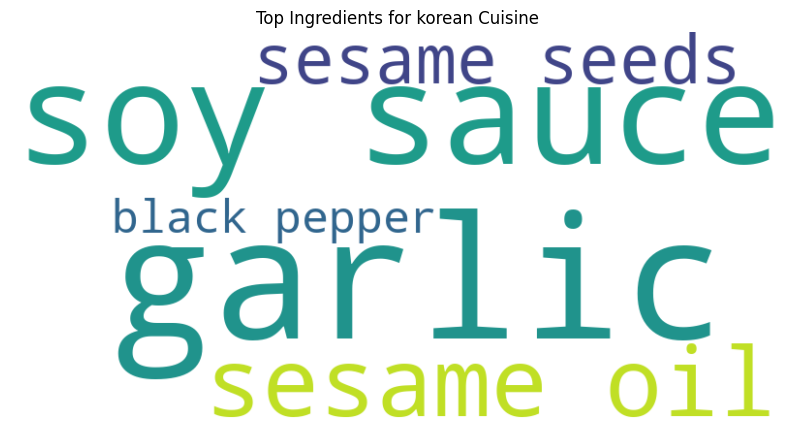

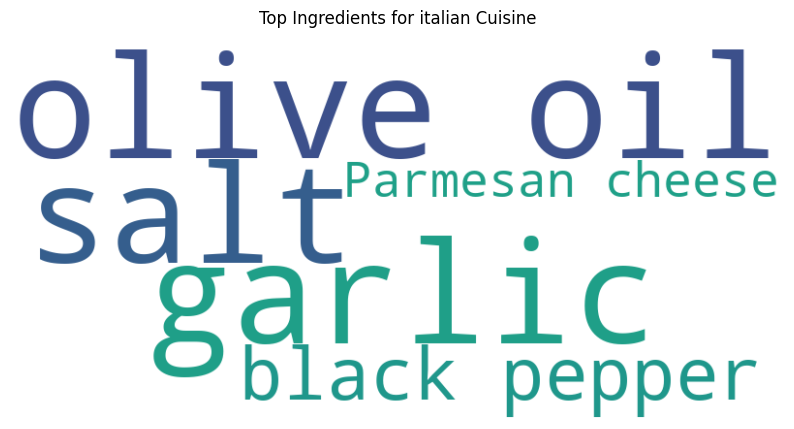

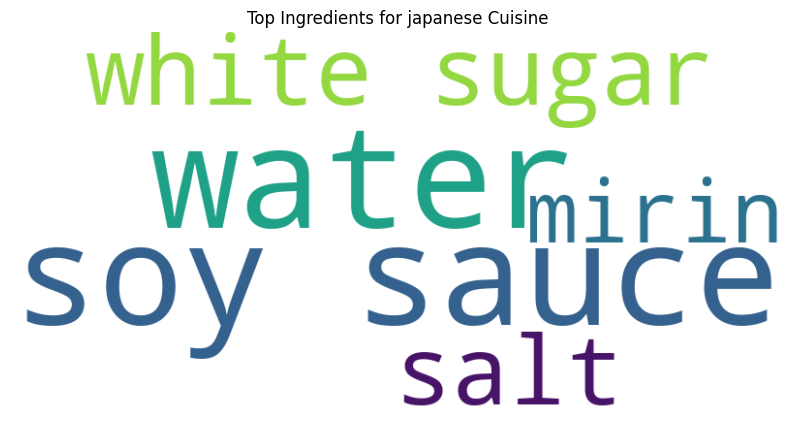

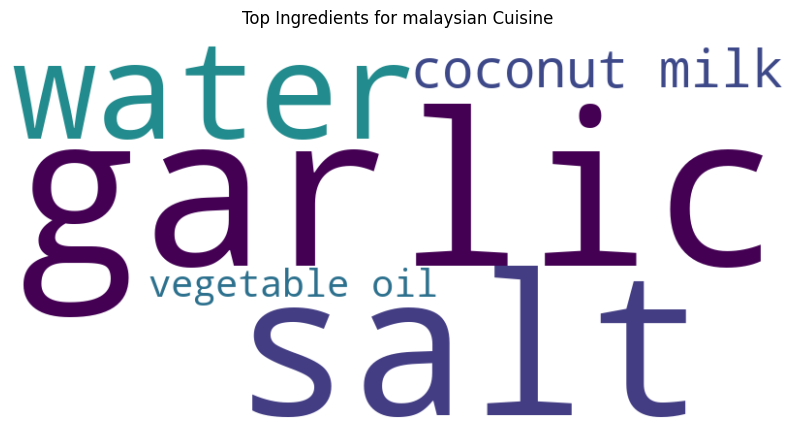

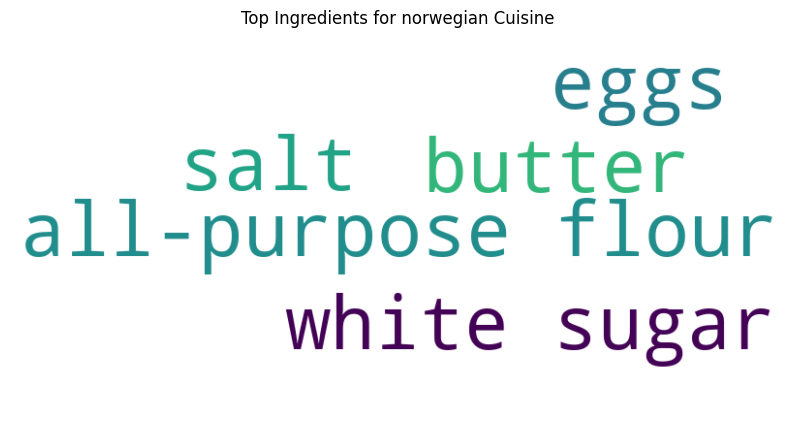

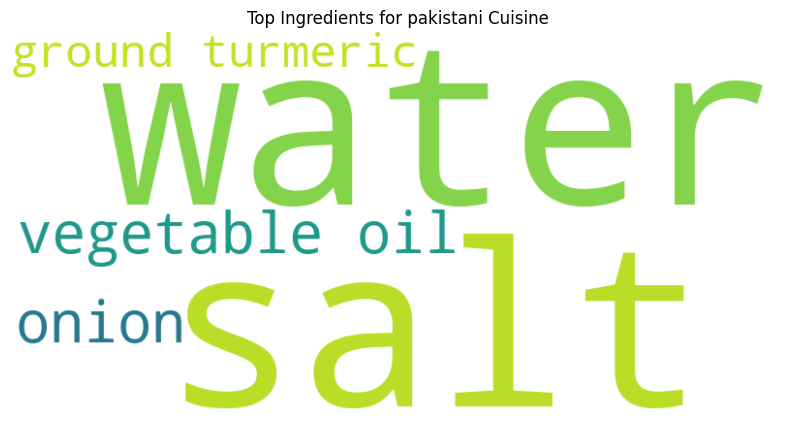

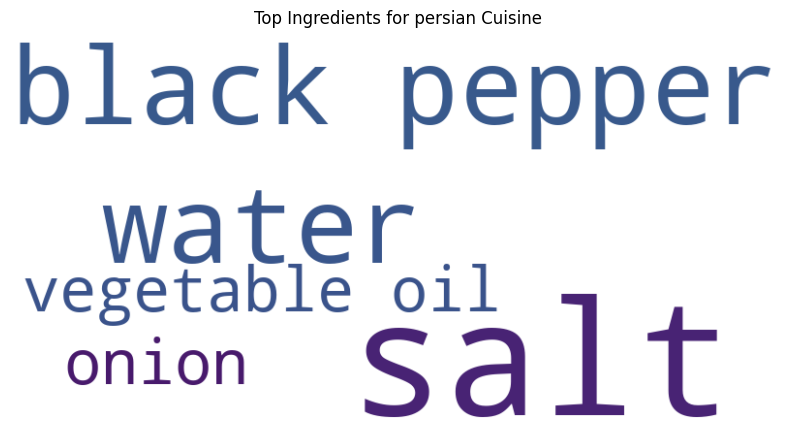

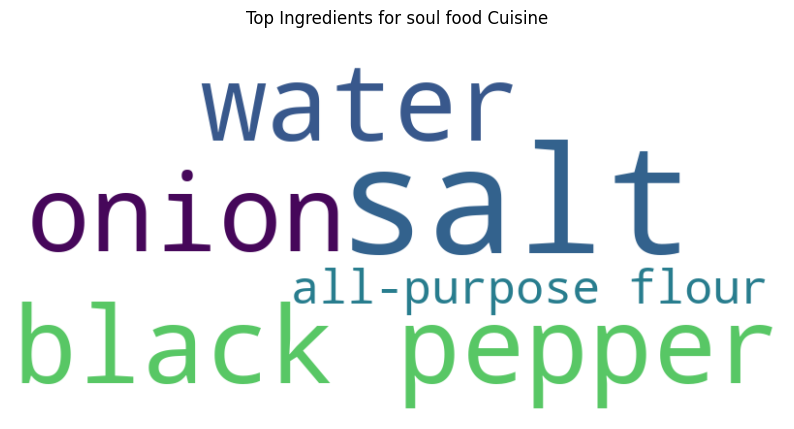

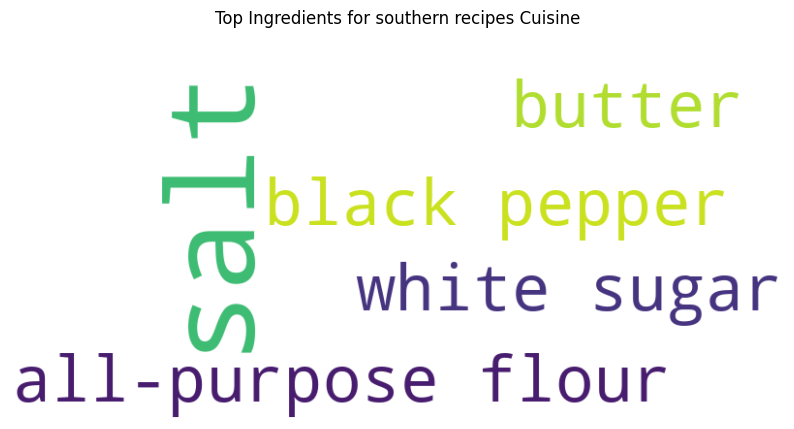

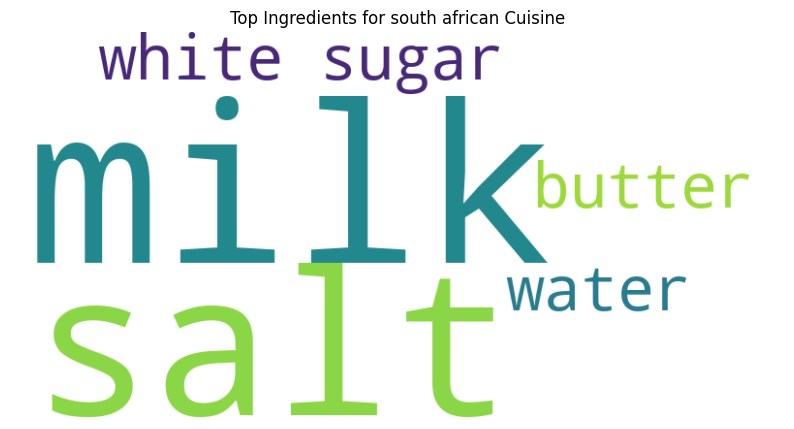

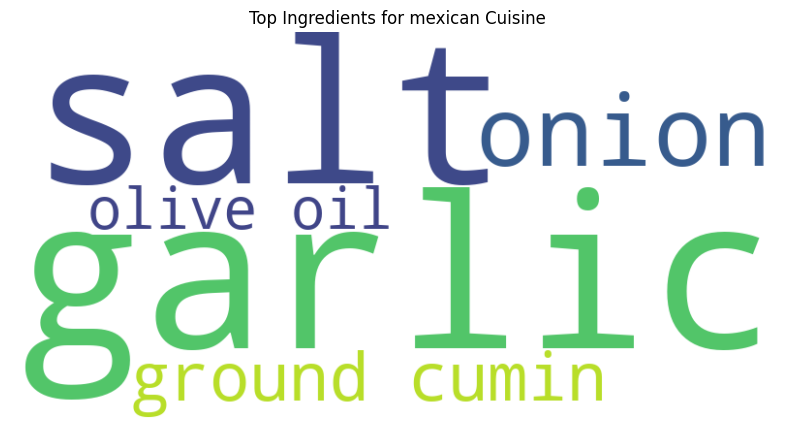

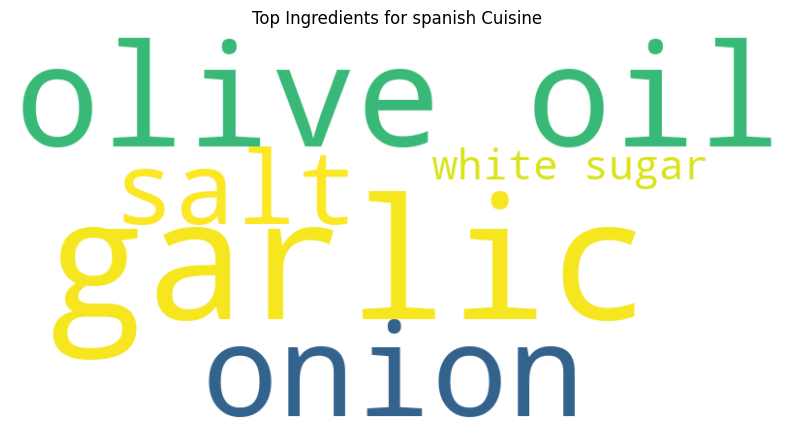

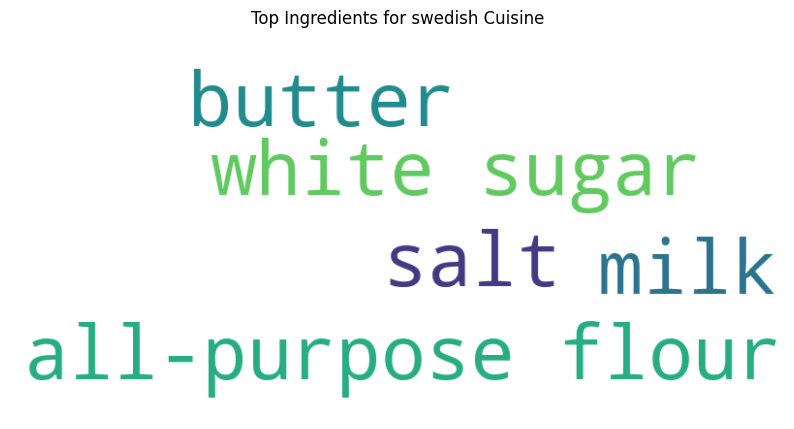

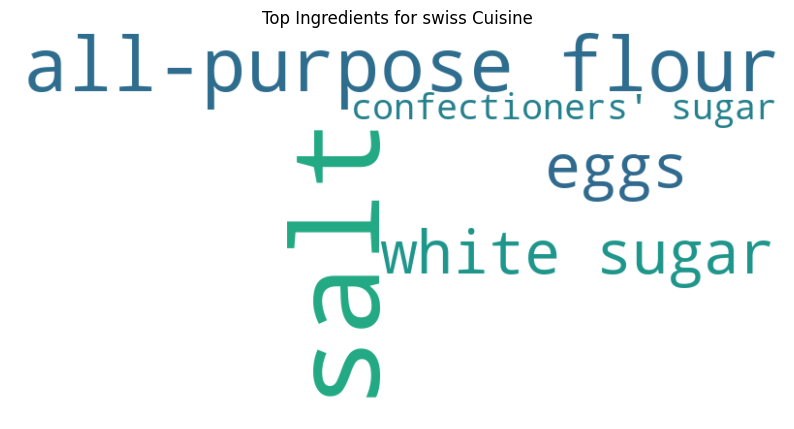

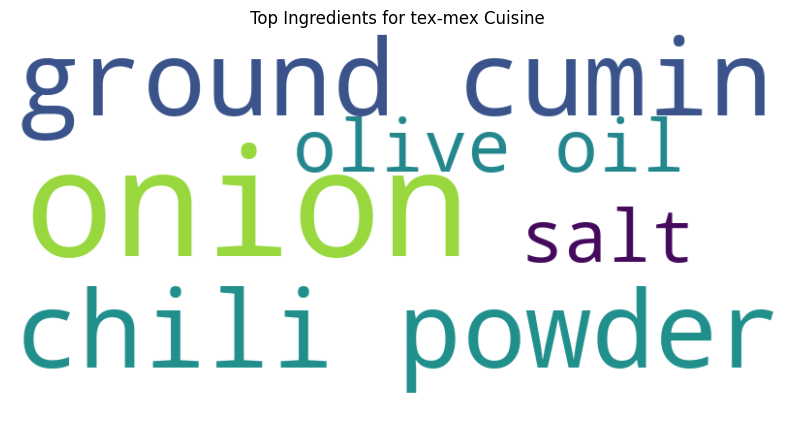

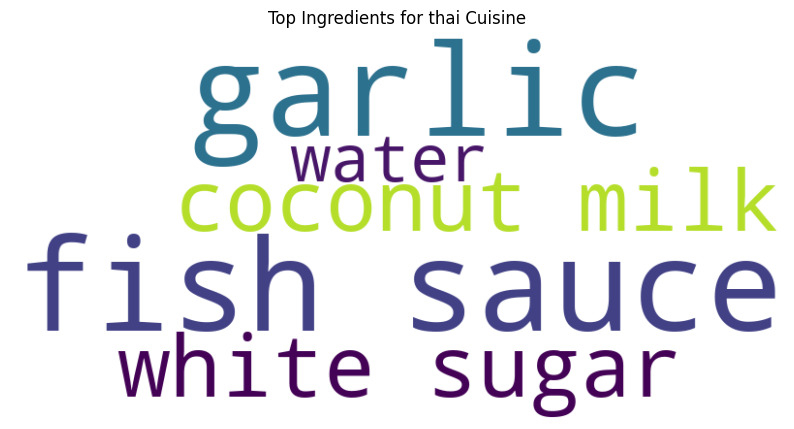

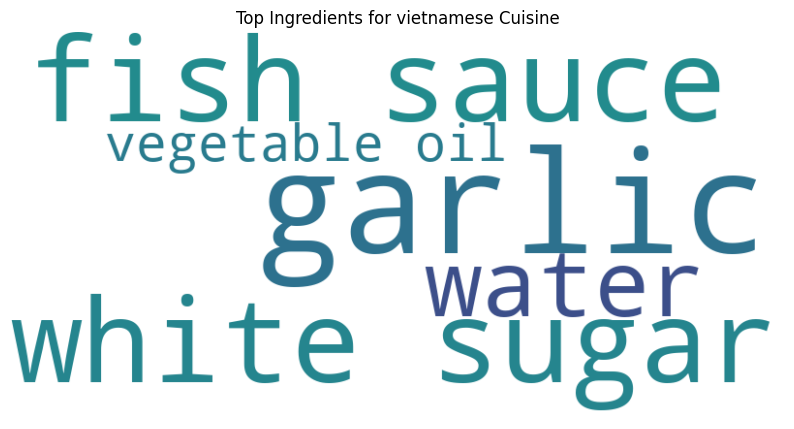

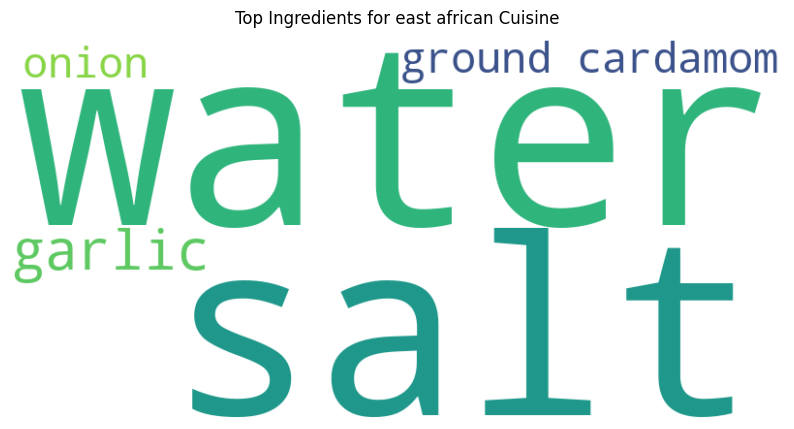

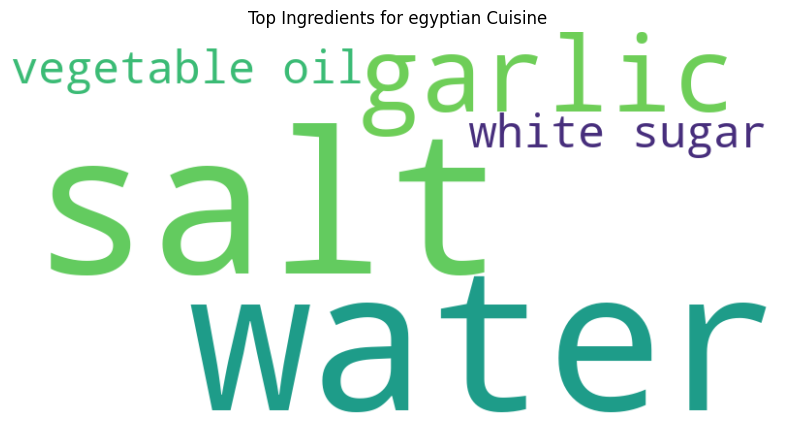

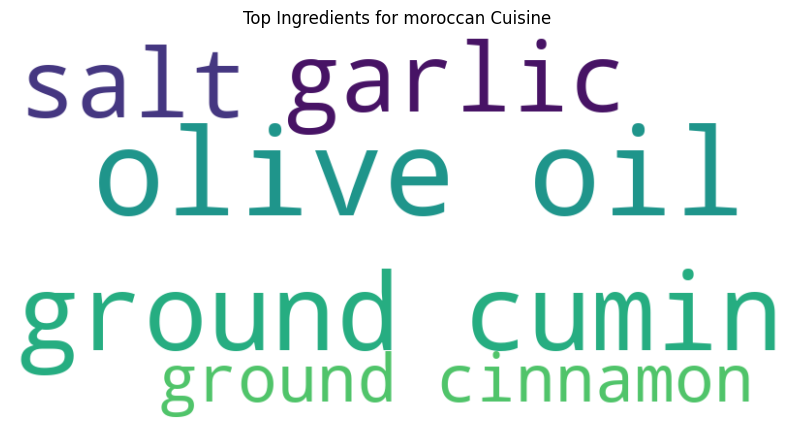

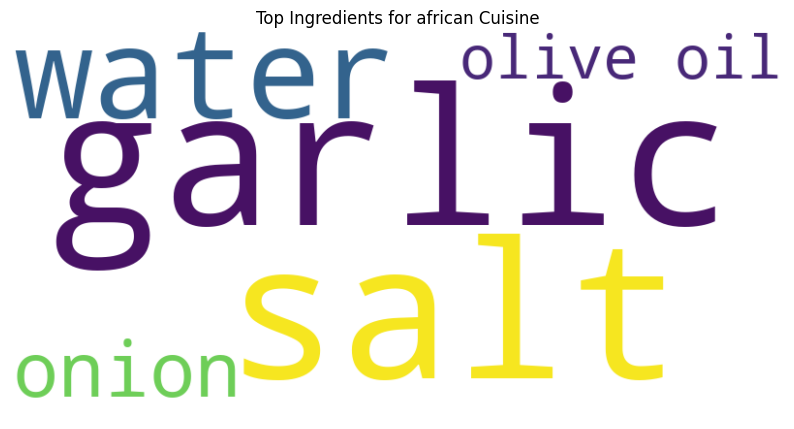

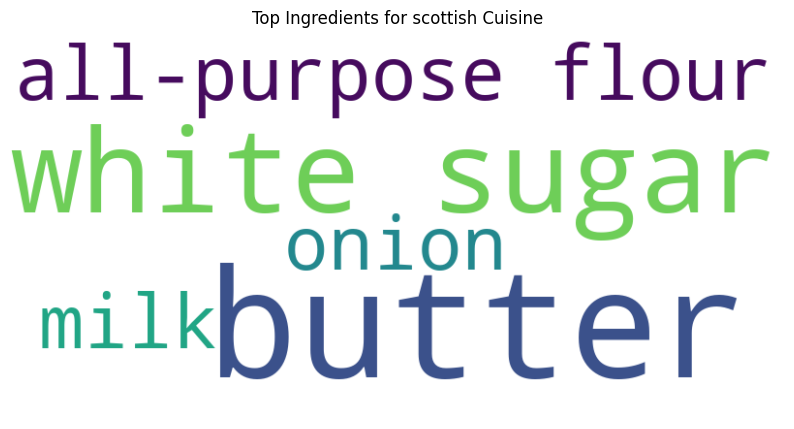

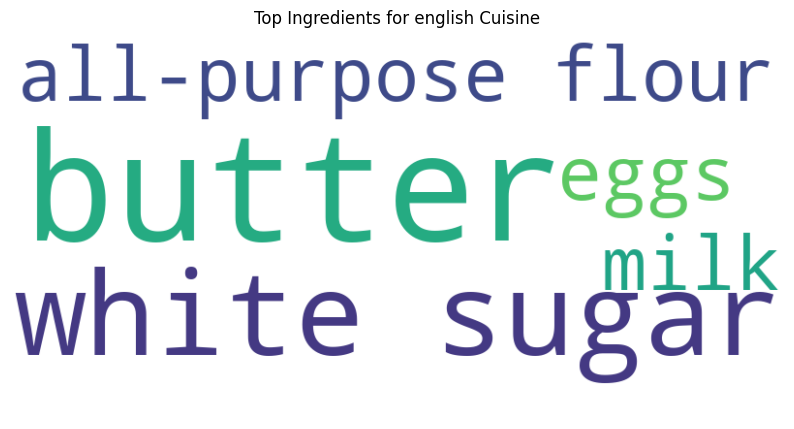

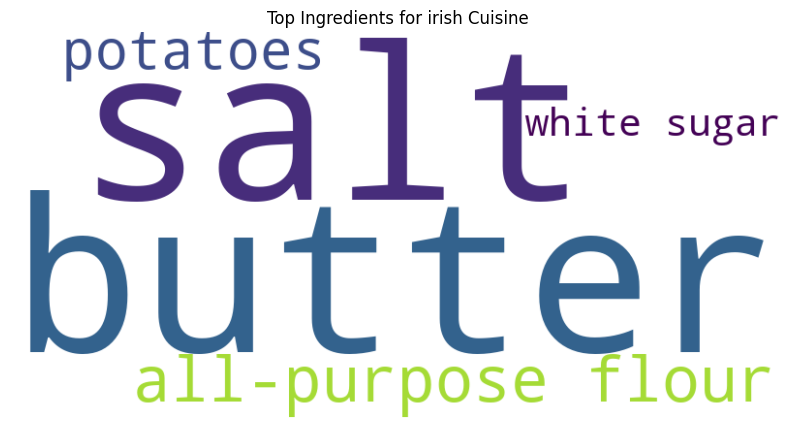

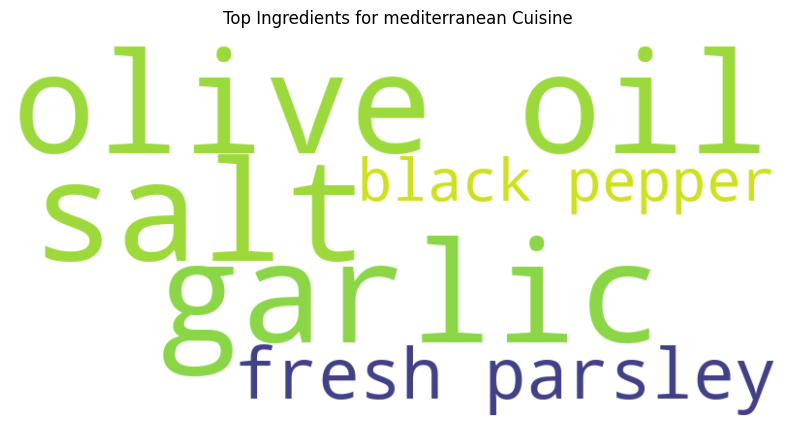

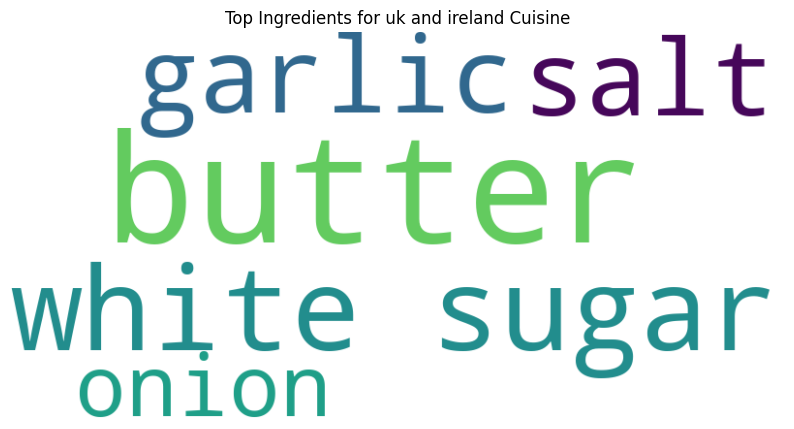

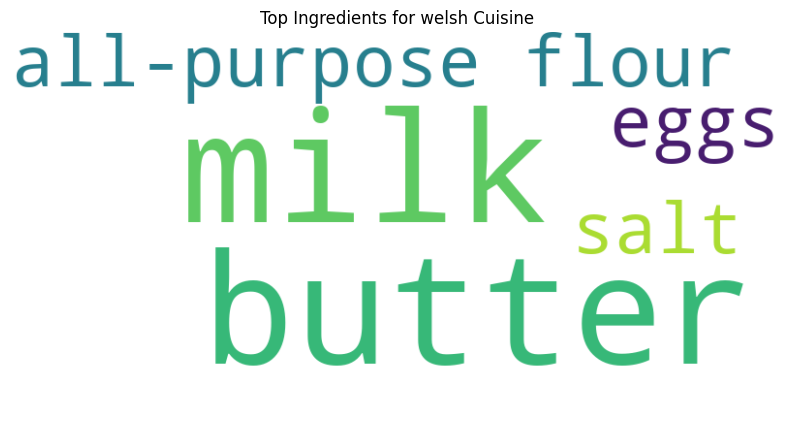

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given cuisine
def generate_word_cloud(cuisine, top_ingredients):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_ingredients))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Ingredients for {cuisine} Cuisine")
    plt.axis('off')
    plt.show()

# Iterate through each cuisine and generate word cloud for top ingredients
for cuisine, top_ingredients in top_ingredients_summary.items():
    ingredients_with_frequencies = {ingredient: 1 for ingredient in top_ingredients}
    generate_word_cloud(cuisine, ingredients_with_frequencies)


### HeatMap Visualization of the cosine similarity ###

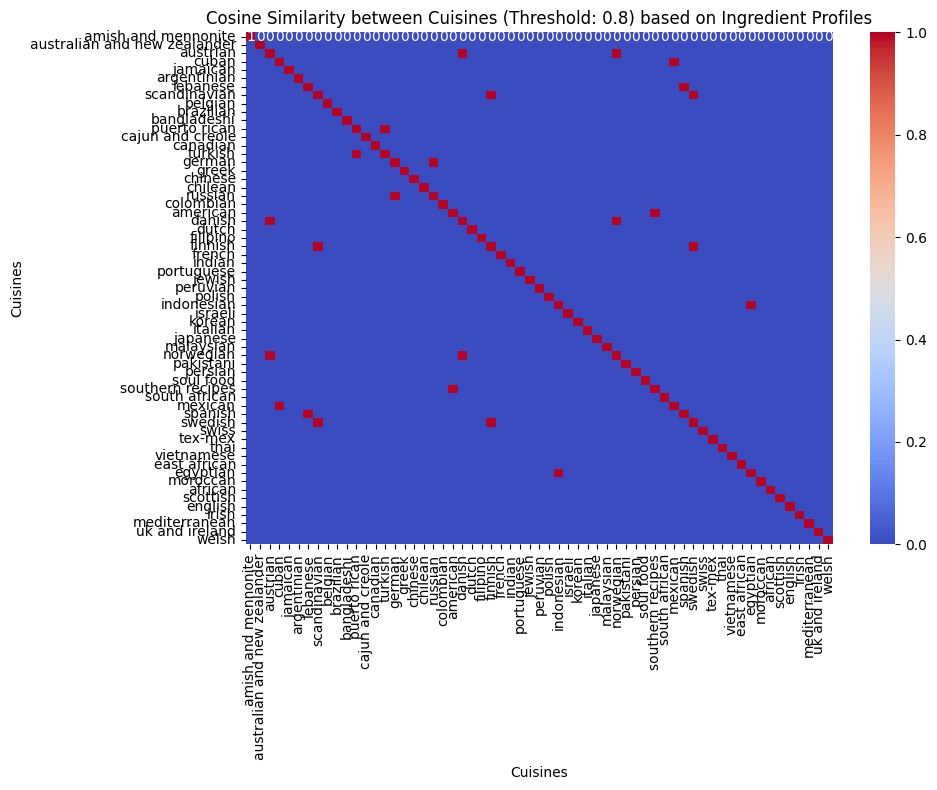

In [116]:
# Get the list of all unique ingredients across all cuisines
all_unique_ingredients = set()
for top_ingredients in top_ingredients_summary.values():
    all_unique_ingredients.update(top_ingredients)
all_unique_ingredients = list(all_unique_ingredients)

# Create a matrix where rows represent cuisines and columns represent ingredients
cuisine_ingredient_matrix = np.zeros((len(top_ingredients_summary), len(all_unique_ingredients)))

# Populate the matrix with ingredient frequencies for each cuisine
for i, (cuisine, top_ingredients) in enumerate(top_ingredients_summary.items()):
    for ingredient in top_ingredients:
        j = all_unique_ingredients.index(ingredient)
        cuisine_ingredient_matrix[i, j] = 1


# Create a matrix where rows represent cuisines and columns represent ingredients
cuisine_ingredient_matrix = np.zeros((len(top_ingredients_summary), len(all_unique_ingredients)))

# Populate the matrix with ingredient frequencies for each cuisine
for i, (cuisine, top_ingredients) in enumerate(top_ingredients_summary.items()):
    for ingredient in top_ingredients:
        j = all_unique_ingredients.index(ingredient)
        cuisine_ingredient_matrix[i, j] = 1

# Calculate cosine similarity between cuisines
similarity_matrix = cosine_similarity(cuisine_ingredient_matrix)

# Set threshold for cosine similarity
threshold = 0.8
# Apply threshold to similarity matrix
similarity_matrix_thresholded = similarity_matrix.copy()
similarity_matrix_thresholded[similarity_matrix < threshold] = 0

# Visualize similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(similarity_matrix_thresholded, annot=True, cmap='coolwarm', xticklabels=top_ingredients_summary.keys(), yticklabels=top_ingredients_summary.keys())
plt.title(f'Cosine Similarity between Cuisines (Threshold: {threshold}) based on Ingredient Profiles')
plt.xlabel('Cuisines')
plt.ylabel('Cuisines')
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()


## Cosine Similarity Analysis: Summary Table

In this analysis, we have identified cuisines that are similar to each other based on a cosine similarity threshold of 0.8. Cuisines with cosine similarity scores equal to or above the threshold are considered similar. Below is a summary table showing the similar cuisines for each cuisine.

### Summary Table

In [117]:
# Set threshold for cosine similarity
threshold = 0.8

# Initialize an empty dictionary to store similar cuisines
similar_cuisines = {}

# Iterate through the similarity matrix to identify similar cuisines
for i, cuisine1 in enumerate(top_ingredients_summary.keys()):
    for j, cuisine2 in enumerate(top_ingredients_summary.keys()):
        if i != j and similarity_matrix[i, j] >= threshold:
            if cuisine1 not in similar_cuisines:
                similar_cuisines[cuisine1] = [cuisine2]
            else:
                similar_cuisines[cuisine1].append(cuisine2)

# Create a summary table
print(f"Summary of cuisines similar to each other (Threshold: {threshold}):")
for cuisine, similar in similar_cuisines.items():
    print(f"{cuisine}: {', '.join(similar)}")


Summary of cuisines similar to each other (Threshold: 0.8):
austrian: danish, norwegian
cuban: mexican
lebanese: spanish
scandinavian: finnish, swedish
puerto rican: turkish
turkish: puerto rican
german: russian
russian: german
american: southern recipes
danish: austrian, norwegian
finnish: scandinavian, swedish
indonesian: egyptian
norwegian: austrian, danish
southern recipes: american
mexican: cuban
spanish: lebanese
swedish: scandinavian, finnish
egyptian: indonesian
